In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import sequence

import tensorflow as tf

from tensorflow.keras import layers

from keras.utils.vis_utils import plot_model

from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Input, Dropout, Embedding, concatenate
from keras.utils.vis_utils import plot_model

# Provides function for sliding window for training data of time series data https://www.tensorflow.org/tutorials/structured_data/time_series#the_weather_dataset
# How do we use our LSTM model as an input to a dense model with member features?
# Reference for classification with LSTM https://keras.io/examples/imdb_lstm/
# TODO Multi-input https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/

Using TensorFlow backend.


# Load Data

In [4]:
X_members = np.load("val_members.npy")
X_user_logs = np.load("val_padded_user_logs.npy")
y = np.load("val_labels.npy")

In [22]:
num_members_cols = X_members.shape[1]
num_members_cols

27

# Multi Input Example

In [35]:
# Dumb example, but as shown below, there are 2 inputs that go through seperate models and areconcatenated together

batch_size = 100
num_batch = 250
num_integers = 10
max_integer = num_integers - 1
epochs = 3
lstm_units = 16
embedding_size = 16

num_members = X_user_logs.shape[0]
num_dates = X_user_logs.shape[1]
num_user_log_cols = X_user_logs.shape[2]
num_member_cols = X_members.shape[1]

data_in_a = Input(shape = (num_dates,num_user_log_cols))
#a = Embedding(num_integers, embedding_size)(data_in_a)
a = LSTM(lstm_units)(data_in_a)
a_mod = Model(data_in_a, outputs=a)

data_in_b = Input(shape = (num_member_cols,))
b = Dense(5, activation='relu')(data_in_b)
b_mod = Model(data_in_b, outputs=b)

combined = concatenate([a_mod.output, b_mod.output])

c = Dropout(0.2)(combined)
c = Dense(1, activation='softmax')(c)

model = Model(inputs=[a_mod.input, b_mod.input], outputs=c)
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

#model.summary()
model.fit([X_user_logs, X_members], y, batch_size=batch_size, epochs=epochs,verbose=1)





Epoch 1/3





920/920 [==============================] - 6s 7ms/step - loss: 15.2492 - acc: 0.0435
Epoch 2/3
920/920 [==============================] - 4s 4ms/step - loss: 15.2492 - acc: 0.0435
Epoch 3/3
920/920 [==============================] - 4s 4ms/step - loss: 15.2492 - acc: 0.0435


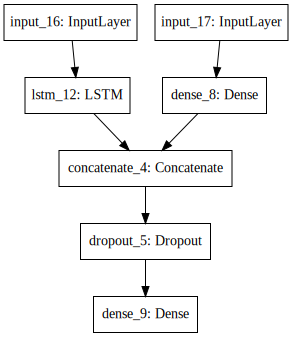

In [33]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))